Name: Haoxin Yu

# Oklahoma purchase credit card transactions project
This dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions.

In [6]:
import pandas as pd
df = pd.read_csv('purchase_credit_card.csv') 
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [7]:
# check dimensions of the dataset, we found it has 442,458 rows and 11 columns 
print(df.shape)
print(df.columns) # check column names
df.describe() # Get the Simple Summary Statistics 

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


In [8]:
# change column names 
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

**1.1 Create date fields**

In [9]:
#Creating separate Year and Month columns for future feature engineering
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

In [10]:
df.columns

Index(['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
       'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor',
       'Transaction_Date', 'Posted_Date', 'Merchant_Category', 'Year', 'Month',
       'Week_Number', 'Day_of_Week'],
      dtype='object')

**Initial observations**

According to the graph, we can see University of OKLAHOMA has the most transactions, followed by Univ. of Okla health science center

<Axes: xlabel='Count', ylabel='Agency_Name'>

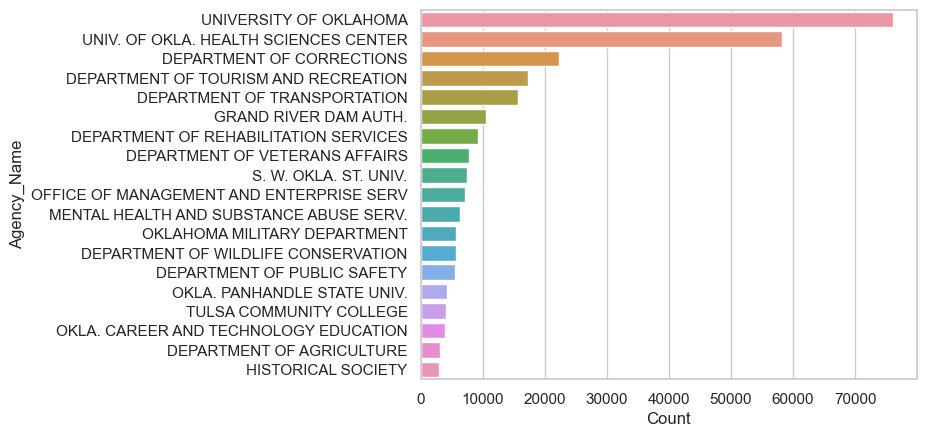

In [11]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px

# Summarize the count statistics by agency_name in df_count
df_count = df['Agency_Name'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Agency_Name','Count']

fig = px.bar(df_count, x='Agency_Name', y='Count', color = 'Agency_Name', width=1000, height=400)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="Agency_Name", x="Count", data=df_count[1:20])

According to the graph, we can see Bookstore has the most transactions.

<Axes: xlabel='Count', ylabel='Merchant_Category'>

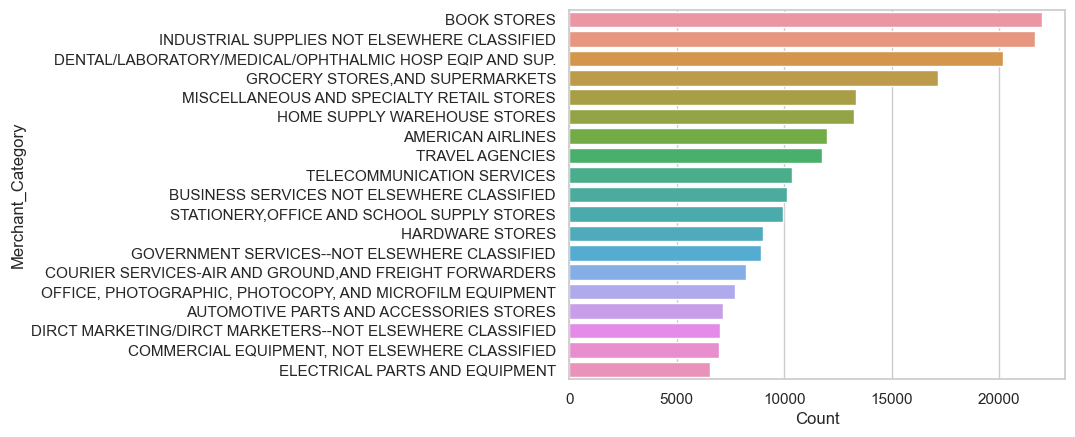

In [12]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px

# Summarize the count statistics by agency_name in df_count
df_count = df['Merchant_Category'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Merchant_Category','Count']

fig = px.bar(df_count, x='Merchant_Category', y='Count', color = 'Merchant_Category', width=1000, height=400)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="Merchant_Category", x="Count", data=df_count[1:20])

According to the graph, we can see that most transactions happened in December.

<Axes: xlabel='Count', ylabel='Month'>

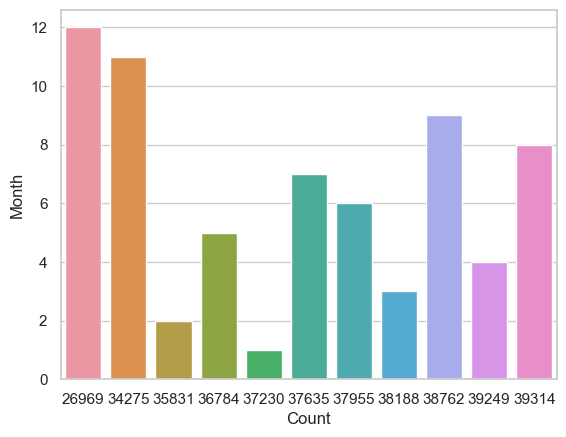

In [27]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px

# Summarize the count statistics by agency_name in df_count
df_count = df['Month'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Month','Count']

fig = px.bar(df_count, x='Month', y='Count', color = 'Month', width=1000, height=400)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="Month", x="Count", data=df_count[1:20])

We can see Thursday has the most transactions.

<Axes: xlabel='Count', ylabel='Day_of_Week'>

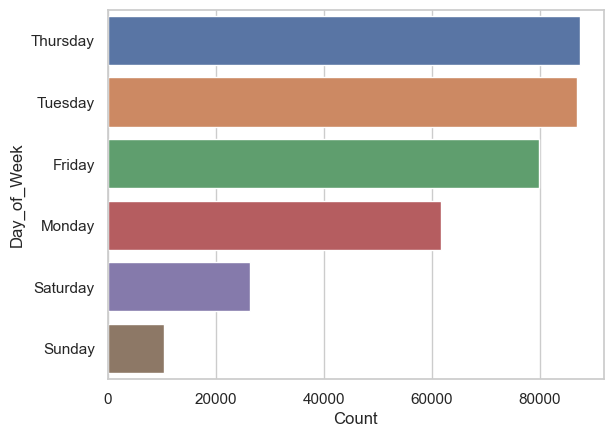

In [28]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px

# Summarize the count statistics by agency_name in df_count
df_count = df['Day_of_Week'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Day_of_Week','Count']

fig = px.bar(df_count, x='Day_of_Week', y='Count', color = 'Day_of_Week', width=1000, height=400)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="Day_of_Week", x="Count", data=df_count[1:20])

## Feature Engineering

·Understand the data grain: each row is a cardholder (last name + first name)

·An agency can have multiple cardholders. A corporate card (agency_name) can be used by many cardholders and these cardholders have to follow the corporation policy.

·Intuition: One or two cardholders may abuse their corporate cards. If we compare a cardholder to his agency, we can find outliers.

·The spending for a merchant category can be higher than others. It does not make sense to compare the spending of a merchant category to another. An agency can spend on various merchant categories, and you cannot claim anomalies just because the spending on one merchant category is higher than another.

·Anomaly detection is about "comparing a transaction to a benchmark". What is the right benchmark?

·So we will aggregate to the Aggrecy_Name level and card holder level then build features.

·Common sense tells us the comparison should be at "Agency_Name" and "Merchant_Category" level.

### Feature 1: The ratio to average amount by agency and merchant category

In [29]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency_Name                     Merchant_Category                                     
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED  115.120000
                                CATALOG MERCHANTS                           -53.344286
                                COMPUTER NETWORK/INFORMATION SERVICES        18.340000
                                DRUG STORES AND PHARMACIES                  153.450000
                                GROCERY STORES,AND SUPERMARKETS              74.525455
...                                                                                ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                  118.054000
                                TRAVEL AGENCIES                              24.253731
                                TROPICANA RESORT AND CASINO                 481.600000
                                UNITED AIRLINES                             310.547368
                                WYNDHAM HOTELS                               93.282857

[8427 rows x 1 columns]

In [30]:
df1 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
df1['agency_merchant_avg_ratio_amount'] = np.where(df1['AVG_amount']==0,0, df1['Amount'] / df1['AVG_amount'])
df1['agency_merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999724
std           7.225363
min       -2735.680000
25%           0.177145
50%           0.515301
75%           1.102916
max        2735.680000
Name: agency_merchant_avg_ratio_amount, dtype: float64

**The above percentile impacts me to cut by percentile for plotting.**

**Do you notice some transactions can be 2 times of the average. I'm wondering if they could be anomalies.**

In [31]:
# cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut(df1[var],percentile)
df1[['agency_merchant_avg_ratio_amount_D']]

,agency_merchant_avg_ratio_amount_D
0,"(1.298, 3.515]"
1,"(0.515, 1.298]"
2,"(0.133, 0.515]"
3,"(1.298, 3.515]"
4,"(0.133, 0.515]"
...,...
442453,"(0.515, 1.298]"
442454,"(0.133, 0.515]"
442455,"(0.0212, 0.133]"
442456,"(8.71, 2735.68]"


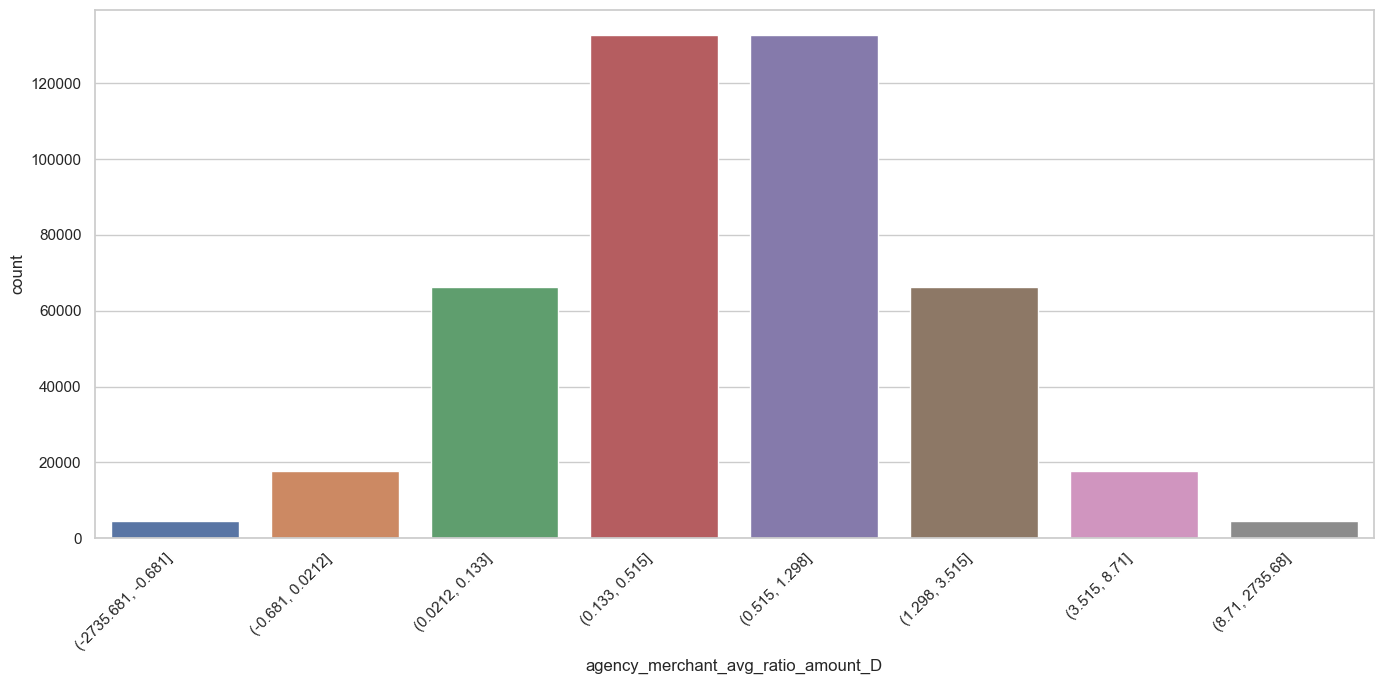

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df1)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

**Now we have identified extreme spending compared to the same merchant category. We want to take a look of them.**

In [36]:
df1[df1['agency_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,427.634060,2.081219,"(1.298, 3.515]"
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,392.641168,9.122833,"(8.71, 2735.68]"
35,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,GODSEY,R,GENERAL PURCHASE,407.85,OPTIMUM ENERGY PROD,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,170.060436,2.398265,"(1.298, 3.515]"


### Feature 2: The ratio to the median amount by agency and merchant category

The only difference to the above code is "median".

In [37]:
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']

In [38]:
df2 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
df2['agency_merchant_median_ratio_amount'] = np.where(df2['Median_amount']==0,0, df2['Amount'] / df2['Median_amount'])
df2['agency_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          4.952685
std        1078.581350
min       -1003.176471
25%           0.466090
50%           1.000000
75%           2.121102
max      528116.052705
Name: agency_merchant_median_ratio_amount, dtype: float64

In [39]:
# cut by percentile for plotting
var = 'agency_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut( df2[var],percentile)

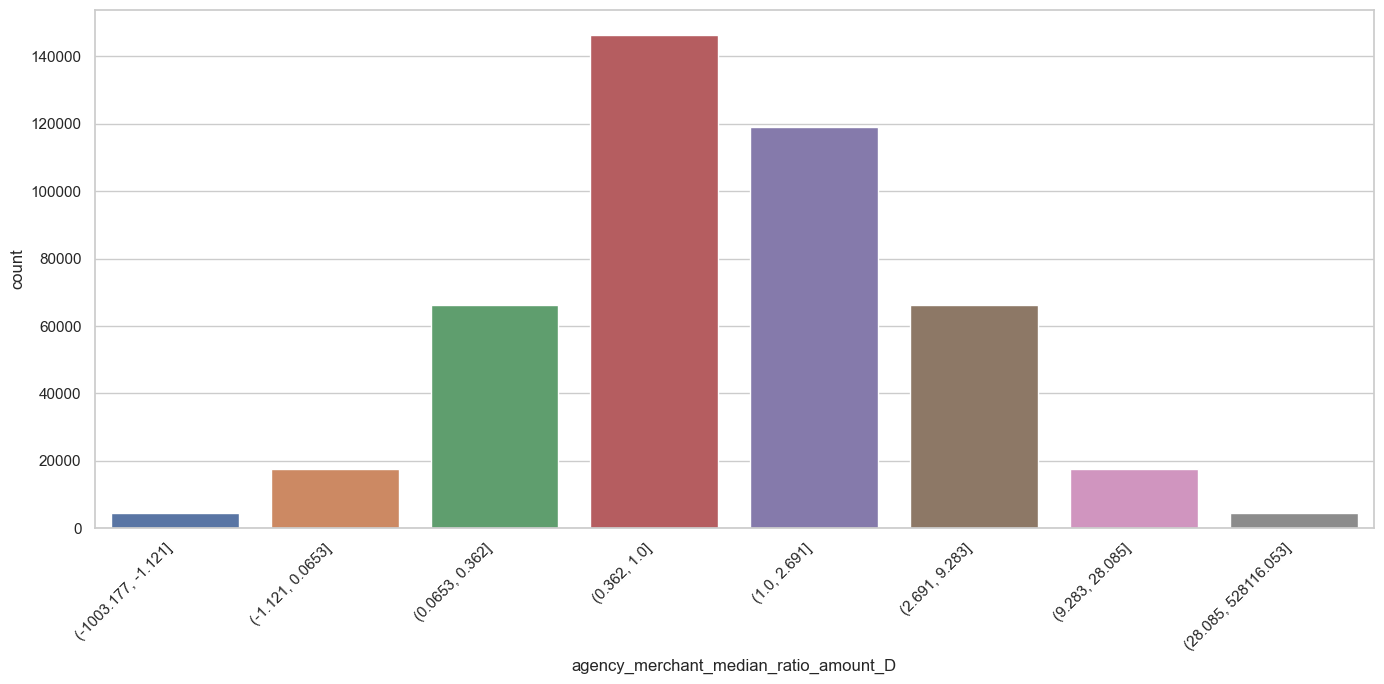

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="agency_merchant_median_ratio_amount_D", data=df2)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [41]:
df2[df2['agency_merchant_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_median_ratio_amount,agency_merchant_median_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,250.000,3.560000,"(2.691, 9.283]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,32.485,2.967216,"(2.691, 9.283]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,181.940,2.167088,"(1.0, 2.691]"
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,31,Tuesday,187.000,3.060267,"(2.691, 9.283]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,91.500,4.863388,"(2.691, 9.283]"


### Feature 3: The ratio to average amount by agency, merchant category, and month

In [42]:
# create average spending group by month 
stat_by_month = df.groupby(['Month', 'Agency_Name','Merchant_Category'])['Amount'].mean()
stat_by_month = pd.DataFrame(stat_by_month)
stat_by_month.columns = ['AVG_amount']
stat_by_month

AVG_amount
Month Agency_Name                     Merchant_Category                                             
1     ARDMORE HIGHER EDUCATION CENTER GROCERY STORES,AND SUPERMARKETS                     132.620000
                                      HOME SUPPLY WAREHOUSE STORES                        121.310000
                                      MISCELLANEOUS FOOD STORES-CONV STRS AND SPECIAL...  153.810000
      ATTORNEY GENERAL                AMERICAN AIRLINES                                   406.942857
                                      BOOK STORES                                          24.990000
...                                                                                              ...
12    `DEPARTMENT OF EDUCATION        STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITI...  260.321538
                                      TELECOMMUNICATION SERVICES                          113.740000
                                      TRAVEL AGENCIES                                      25.000000
                                      UNITED AIRLINES                                     199.633333
                                      WYNDHAM HOTELS                                      130.596000

[39888 rows x 1 columns]

In [43]:
df3 = pd.merge(df, stat_by_month, how='left', on=['Month', 'Agency_Name','Merchant_Category'])
df3['month_merchant_avg_ratio_amount'] = np.where(df3['AVG_amount']==0,0, df3['Amount'] / df3['AVG_amount'])
df3['month_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.993083e-01
std      5.961952e+13
min     -2.447706e+16
25%      2.017647e-01
50%      5.984763e-01
75%      1.125213e+00
max      3.059633e+16
Name: month_merchant_avg_ratio_amount, dtype: float64

In [44]:
# cut by percentile for plotting
var = 'month_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var],percentile)
df3[['month_merchant_avg_ratio_amount_D']]

,month_merchant_avg_ratio_amount_D
0,"(1.34, 3.417]"
1,"(0.598, 1.34]"
2,"(0.151, 0.598]"
3,"(1.34, 3.417]"
4,"(0.151, 0.598]"
...,...
442453,"(0.151, 0.598]"
442454,"(0.151, 0.598]"
442455,"(0.0239, 0.151]"
442456,"(8.05, 3.0596329968448308e+16]"


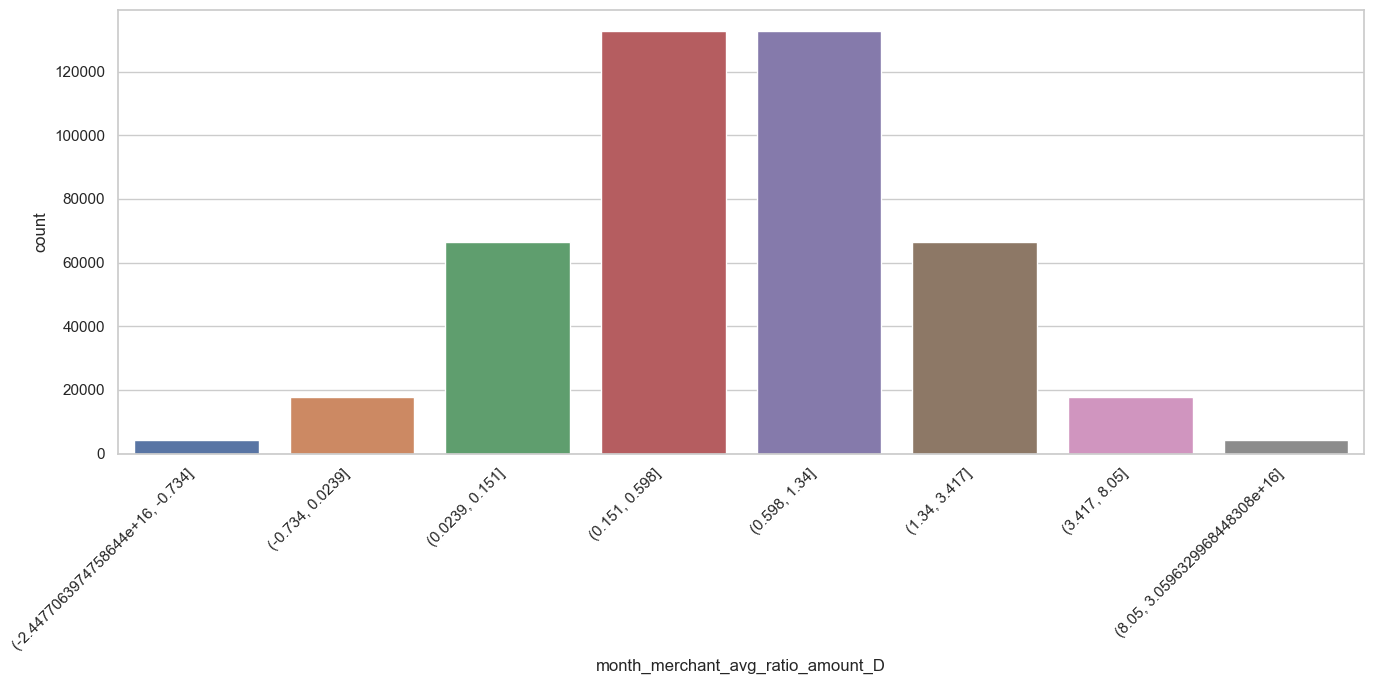

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="month_merchant_avg_ratio_amount_D", data=df3)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [46]:
df3[df3['month_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,month_merchant_avg_ratio_amount,month_merchant_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,235.679053,10.289417,"(8.05, 3.0596329968448308e+16]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,235.679053,10.289417,"(8.05, 3.0596329968448308e+16]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,568.982548,6.295448,"(3.417, 8.05]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,568.982548,2.306222,"(1.34, 3.417]"
49,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,914.0,AUTO-CHLOR SERVICES INC,2013-07-24,2013-07-26,CATALOG MERCHANTS,2013,7,30,Wednesday,450.829655,2.027373,"(1.34, 3.417]"


Cardholders within the same agency typically adhere to shared guidelines. Analyzing transaction patterns over time by grouping the data by month enables us to identify any irregularities. By comparing transaction amounts within each month, we can detect unexpected fluctuations. For instance, if there is a sudden surge or decline in transaction amounts compared to the average for that particular month, it may indicate the presence of a potential anomaly.

### Feature 4: The ratio to average amount by Week_Number

In [47]:
# create average spending group by week 
stat_by_week = df.groupby(['Week_Number', 'Agency_Name','Merchant_Category'])['Amount'].mean()
stat_by_week = pd.DataFrame(stat_by_week)
stat_by_week.columns = ['AVG_amount']
stat_by_week

AVG_amount
Week_Number Agency_Name                    Merchant_Category                                             
1           ATTORNEY GENERAL               MISCELLANEOUS AND SPECIALTY RETAIL STORES              302.550
                                           TELECOMMUNICATION SERVICES                             162.180
                                           TOLLS AND BRIDGE FEES                                  145.450
            BD. OF CHEM. TEST ALCOHOL/DRUG CIVIC,SOCIAL AND FRATERNAL ASSOCIATIONS                350.000
            BD. OF MED. LICENSURE & SUPV.  BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED              38.640
...                                                                                                   ...
52          `DEPARTMENT OF EDUCATION       DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE ...    2996.610
                                           PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED         838.660
                                           STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITI...     314.905
                                           TRAVEL AGENCIES                                         25.000
                                           UNITED AIRLINES                                        272.800

[83107 rows x 1 columns]

In [48]:
df4 = pd.merge(df, stat_by_week, how='left', on=['Week_Number', 'Agency_Name','Merchant_Category'])
df4['week_merchant_avg_ratio_amount'] = np.where(df4['AVG_amount']==0,0, df4['Amount'] / df4['AVG_amount'])
df4['week_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.965862e-01
std      3.200676e+15
min     -6.078171e+17
25%      2.483801e-01
50%      7.446154e-01
75%      1.133222e+00
max      6.078171e+17
Name: week_merchant_avg_ratio_amount, dtype: float64

In [49]:
# cut by percentile for plotting
var = 'week_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var],percentile)
df4[['week_merchant_avg_ratio_amount_D']]

,week_merchant_avg_ratio_amount_D
0,"(1.351, 3.23]"
1,"(1.351, 3.23]"
2,"(0.184, 0.745]"
3,"(1.351, 3.23]"
4,"(0.184, 0.745]"
...,...
442453,"(0.745, 1.351]"
442454,"(1.351, 3.23]"
442455,"(0.029, 0.184]"
442456,"(3.23, 7.324]"


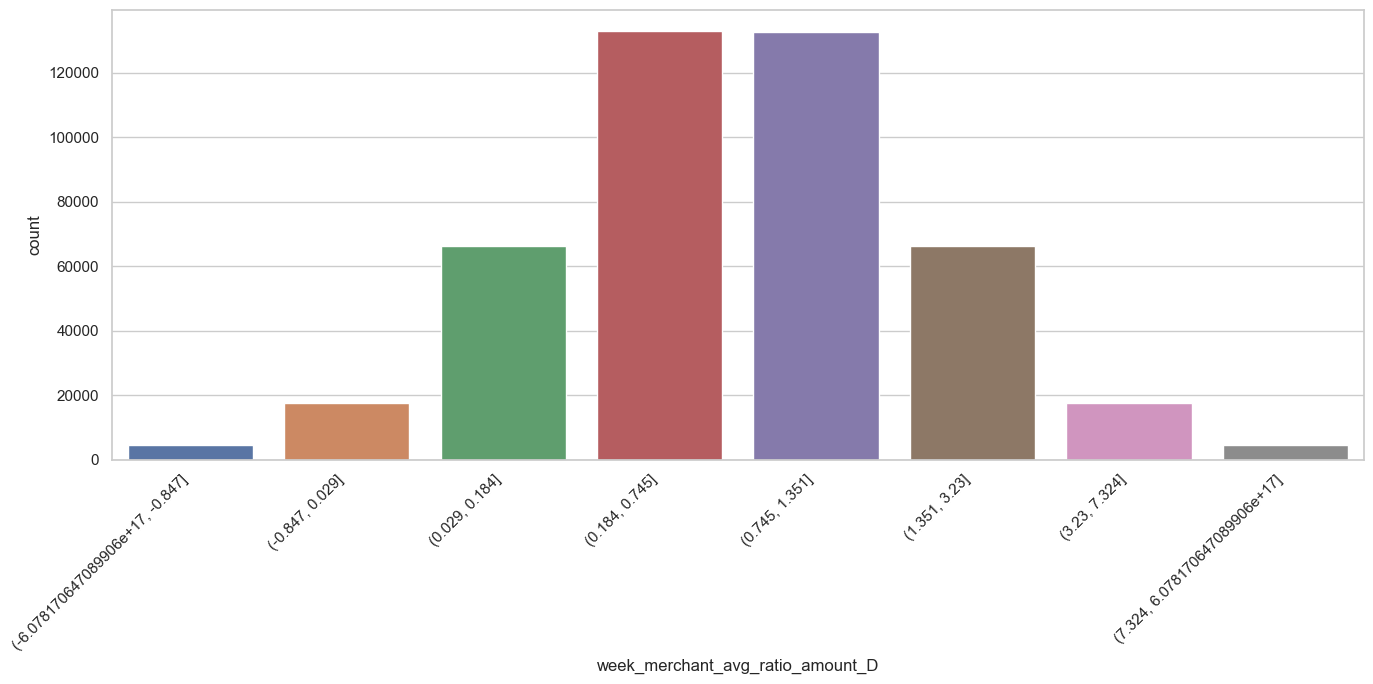

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="week_merchant_avg_ratio_amount_D", data=df4)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [51]:
df4[df4['week_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,week_merchant_avg_ratio_amount,week_merchant_avg_ratio_amount_D
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,46.219348,2.085490,"(1.351, 3.23]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,154.774444,2.547449,"(1.351, 3.23]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,149.247241,2.981630,"(1.351, 3.23]"
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,165.371290,14.663972,"(7.324, 6.078170647089906e+17]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,165.371290,14.663972,"(7.324, 6.078170647089906e+17]"


Cardholders within the same agency generally follow consistent guidelines. Analyzing transaction patterns over time by grouping the data by week number allows us to identify any unusual fluctuations. By comparing transaction amounts within the same week, we can detect any sudden spikes or drops that deviate from the average for that specific week. These anomalies may indicate potential irregularities in the transactions.

### Feature 5: The ratio to average amount by Day_of_Week

In [52]:
# create average spending group by weekday 
stat_by_day_of_week = df.groupby(['Day_of_Week', 'Agency_Name','Merchant_Category'])['Amount'].mean()
stat_by_day_of_week = pd.DataFrame(stat_by_day_of_week)
stat_by_day_of_week.columns = ['AVG_amount']
stat_by_day_of_week

AVG_amount
Day_of_Week Agency_Name                     Merchant_Category                                             
Friday      ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED          115.120000
                                            CATALOG MERCHANTS                                    31.330000
                                            GROCERY STORES,AND SUPERMARKETS                      50.905000
                                            HOME SUPPLY WAREHOUSE STORES                          6.480000
            ATTORNEY GENERAL                AMERICAN AIRLINES                                   499.977778
...                                                                                                    ...
Wednesday   `DEPARTMENT OF EDUCATION        SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ...  250.000000
                                            SOUTHWEST AIRLINES                                  401.800000
                                            STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITI...  372.997692
                                            TRAVEL AGENCIES                                      25.000000
                                            UNITED AIRLINES                                     352.800000

[27574 rows x 1 columns]

In [53]:
# add the new feature average spending to the dataset 
df5 = pd.merge(df, stat_by_day_of_week, how='left', on=['Day_of_Week', 'Agency_Name','Merchant_Category'])
# Feature 5: ratio of amount spending and avergae spending by merchant category 
df5['day_of_week_merchant_avg_ratio_amount'] = np.where(df5['AVG_amount']==0,0, df5['Amount'] / df5['AVG_amount'])
df5['day_of_week_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.986634e-01
std      3.091416e+15
min     -5.875565e+17
25%      1.938586e-01
50%      5.725592e-01
75%      1.115607e+00
max      5.875565e+17
Name: day_of_week_merchant_avg_ratio_amount, dtype: float64

In [54]:
# cut by percentile for plotting
var = 'day_of_week_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var],percentile)
df5[['day_of_week_merchant_avg_ratio_amount_D']]

,day_of_week_merchant_avg_ratio_amount_D
0,"(1.317, 3.454]"
1,"(0.573, 1.317]"
2,"(0.146, 0.573]"
3,"(1.317, 3.454]"
4,"(0.146, 0.573]"
...,...
442453,"(1.317, 3.454]"
442454,"(0.573, 1.317]"
442455,"(0.0233, 0.146]"
442456,"(8.378, 5.875564958853576e+17]"


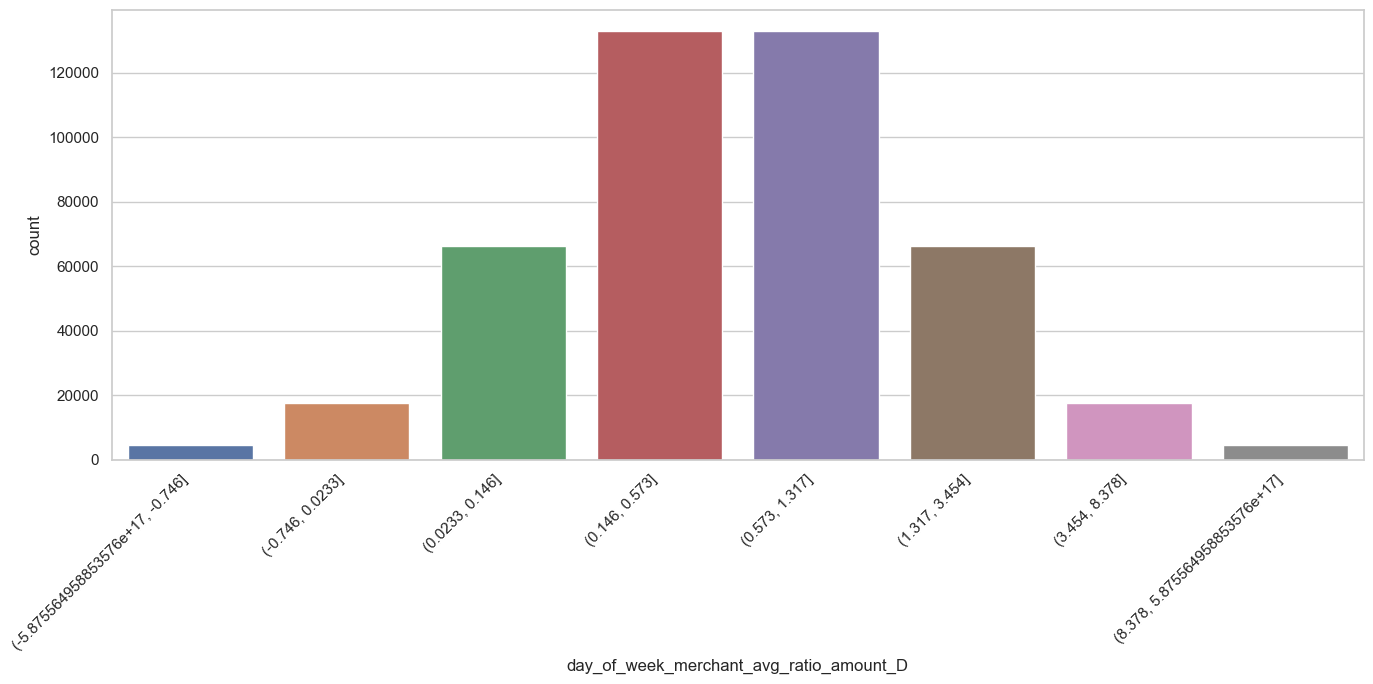

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="day_of_week_merchant_avg_ratio_amount_D", data=df5)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [56]:
df5[df5['day_of_week_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,day_of_week_merchant_avg_ratio_amount,day_of_week_merchant_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,164.736967,14.720436,"(8.378, 5.875564958853576e+17]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,164.736967,14.720436,"(8.378, 5.875564958853576e+17]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,430.365481,8.323158,"(3.454, 8.378]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,423.237493,3.100387,"(1.317, 3.454]"
49,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,914.0,AUTO-CHLOR SERVICES INC,2013-07-24,2013-07-26,CATALOG MERCHANTS,2013,7,30,Wednesday,431.513194,2.118128,"(1.317, 3.454]"


By grouping the data by the day of the week, we can analyze transaction patterns over time. Comparing transaction amounts within the same day of the week enables us to identify any unusual fluctuations. For instance, if there is a sudden increase or decrease in transaction amounts compared to the average for that specific day of the week, it may indicate the presence of potential anomalies.

### Feature 6: The ratio to average amount by agency and vendor

In [57]:
stat_by_vendor = df.groupby(['Agency_Name', 'Vendor'])['Amount'].mean()
stat_by_vendor = pd.DataFrame(stat_by_vendor)
stat_by_vendor.columns = ['AVG_amount']
stat_by_vendor

AVG_amount
Agency_Name                     Vendor                             
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS             92.500000
                                CDW GOVERNMENT           -53.344286
                                COUNTY BUILDING CE        58.440000
                                EMPIRE PAPER COMPANY     443.540000
                                GODADDY.COM               18.340000
...                                                             ...
`DEPARTMENT OF EDUCATION        WORKPLACEDY             2350.000000
                                WWW FOUNDATIONSINC COM   938.000000
                                WWW.LOGMEIN.COM          149.000000
                                WYNDHAM GARDEN HOTEL      93.282857
                                XPEDX-INTL PAPER         464.185000

[111917 rows x 1 columns]

In [58]:
# add the new feature average spending to the dataset 
df6 = pd.merge(df, stat_by_vendor, how='left', on=['Agency_Name', 'Vendor'])
# Feature 6: ratio of amount spending and avergae spending by vendor
df6['agency_vendor_avg_ratio_amount'] = np.where(df6['AVG_amount']==0,0, df6['Amount'] / df6['AVG_amount'])
df6['agency_vendor_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.931041e-01
std      1.963144e+14
min     -6.944551e+16
25%      3.399096e-01
50%      9.543105e-01
75%      1.040700e+00
max      6.424385e+16
Name: agency_vendor_avg_ratio_amount, dtype: float64

In [59]:
df6[df6['agency_vendor_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_vendor_avg_ratio_amount
8,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,2013-07-30,2013-07-31,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",2013,7,31,Tuesday,56.362245,2.530062
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,357.718261,3.668250
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,240.132918,2.977268
53,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DAVIS,M,GENERAL PURCHASE,590.40,UNITED REFRIG BR #82,2013-07-25,2013-07-26,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,30,Thursday,248.647500,2.374446
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.00,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,1736.666667,2.208253


Some agencies or vendors may have a higher risk of fraud due to factors such as their industry, products. To analyze this, we compare transaction amounts within the same agency and vendor. By calculating the average transaction amount for each agency and vendor combination, we establish a benchmark. If there are significant deviations from this average, it could suggest potential anomalies that need to be investigated further.

### Feature 7: The ratio to average amount by cardholder and merchant category

In [61]:
stat_by_cardholder = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial','Merchant_Category'])['Amount'].mean()
stat_by_cardholder = pd.DataFrame(stat_by_cardholder)
stat_by_cardholder.columns = ['AVG_amount']
stat_by_cardholder

AVG_amount
Cardholder_Last_Name Cardholder_First_Initial Merchant_Category              
15000                1                        OTHER FEES          4626.460000
24100                2                        OTHER FEES           278.409000
42000                4                        OTHER FEES           133.998125
44600                4                        OTHER FEES           111.990000
48000                4                        OTHER FEES            96.774615
...                                                                       ...
russell              s                        RESIDENCE INN         94.220000
                                              SLEEP INN            166.000000
                                              SOUTHWEST AIRLINES   537.125000
                                              TRAVEL AGENCIES       25.000000
                                              UNITED AIRLINES      568.000000

[69053 rows x 1 columns]

In [62]:
df7 = pd.merge(df, stat_by_cardholder, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial','Merchant_Category'])
df7['cardholder_avg_ratio_amount'] = np.where(df7['AVG_amount']==0,0, df7['Amount'] / df7['AVG_amount'])
df7['cardholder_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.913963e-01
std      4.286705e+15
min     -7.901622e+17
25%      3.507326e-01
50%      8.349065e-01
75%      1.200309e+00
max      7.901622e+17
Name: cardholder_avg_ratio_amount, dtype: float64

In [63]:
# cut by percentile for plotting
var = 'cardholder_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile)
df7[['cardholder_avg_ratio_amount_D']]

,cardholder_avg_ratio_amount_D
0,"(0.835, 1.388]"
1,"(1.388, 2.883]"
2,"(0.0366, 0.263]"
3,"(1.388, 2.883]"
4,"(1.388, 2.883]"
...,...
442453,"(0.263, 0.835]"
442454,"(0.0366, 0.263]"
442455,"(-0.929, 0.0366]"
442456,"(2.883, 5.785]"


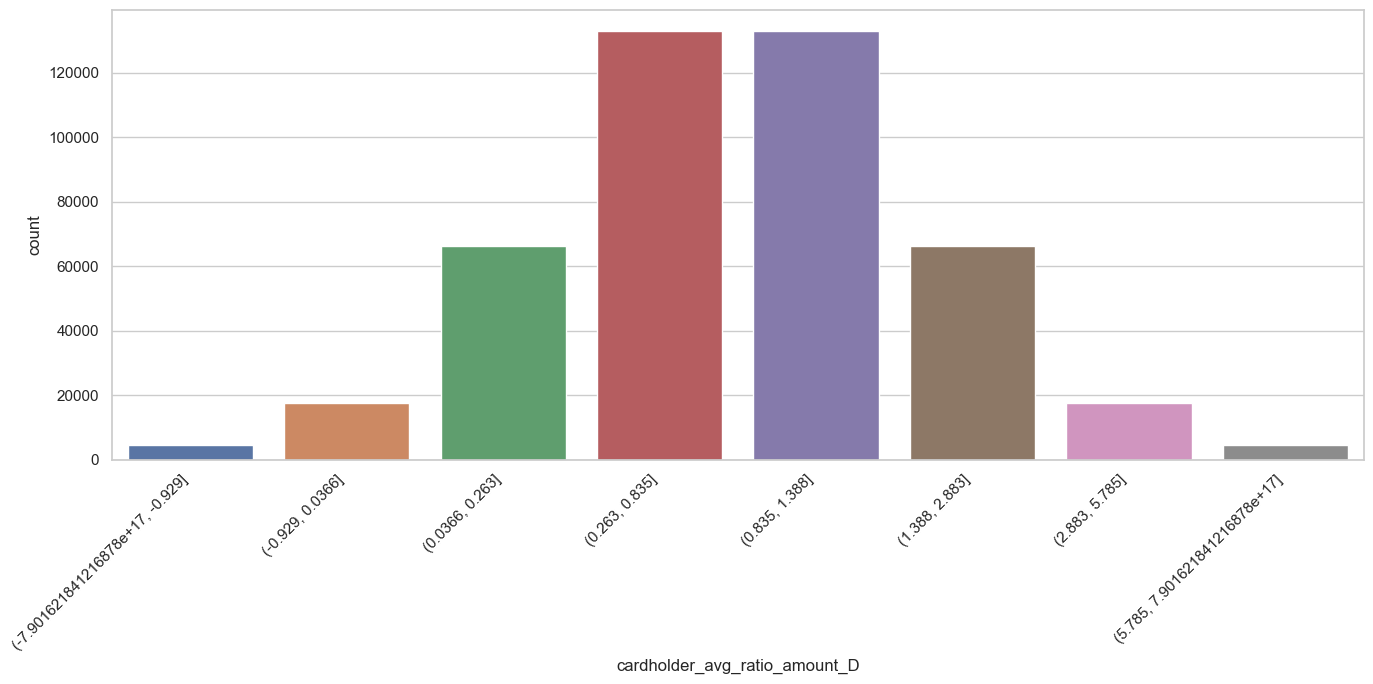

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="cardholder_avg_ratio_amount_D", data=df7)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [65]:
df7[df7['cardholder_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,cardholder_avg_ratio_amount,cardholder_avg_ratio_amount_D
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,164.942857,2.697904,"(1.388, 2.883]"
26,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foye,S,GENERAL PURCHASE,178.00,"AFFYMETRIX, INC",2013-07-26,2013-07-29,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,74.000000,2.405405,"(1.388, 2.883]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,368.033333,3.565438,"(2.883, 5.785]"
57,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Derakhshan,T,IGG RB PURIFIED-25MG EACH|Freight charges EACH,158.49,MILLIPORE AMERICAS,2013-07-25,2013-07-26,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Thursday,39.000000,4.063846,"(2.883, 5.785]"
62,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHYDROGENUHPGR5S...,58.66,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,17.226462,3.405226,"(2.883, 5.785]"


Some cardholders are expected to have similar spending patterns for specific merchant categories. To examine this, we analyze transaction amounts within the same cardholder and merchant category. By calculating the average transaction amount for each cardholder and merchant category combination, we establish a benchmark. Any significant deviations from this average can indicate potential anomalies that require further investigation.

### Feature 8: The ratio to median amount by cardholder and merchant category

In [66]:
stat_by_cardholder = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial','Merchant_Category'])['Amount'].median()
stat_by_cardholder = pd.DataFrame(stat_by_cardholder)
stat_by_cardholder.columns = ['Median_amount']
stat_by_cardholder

Median_amount
Cardholder_Last_Name Cardholder_First_Initial Merchant_Category                
15000                1                        OTHER FEES               4626.460
24100                2                        OTHER FEES                 10.535
42000                4                        OTHER FEES                  2.390
44600                4                        OTHER FEES                111.990
48000                4                        OTHER FEES                  6.530
...                                                                         ...
russell              s                        RESIDENCE INN              94.220
                                              SLEEP INN                 166.000
                                              SOUTHWEST AIRLINES        487.500
                                              TRAVEL AGENCIES            25.000
                                              UNITED AIRLINES           568.000

[69053 rows x 1 columns]

In [67]:
df8 = pd.merge(df, stat_by_cardholder, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial','Merchant_Category'])
df8['cardholder_median_ratio_amount'] = np.where(df8['Median_amount']==0,0, df8['Amount'] / df8['Median_amount'])
df8['cardholder_median_ratio_amount'].describe()

count    4.424580e+05
mean     1.050739e+02
std      4.860020e+04
min     -8.195918e+02
25%      6.228244e-01
50%      1.000000e+00
75%      1.500000e+00
max      2.379823e+07
Name: cardholder_median_ratio_amount, dtype: float64

In [68]:
# cut by percentile for plotting
var = 'cardholder_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut( df8[var],percentile)
df8[['cardholder_median_ratio_amount_D']]

,cardholder_median_ratio_amount_D
0,"(0.489, 1.0]"
1,"(1.0, 1.811]"
2,"(0.489, 1.0]"
3,"(1.811, 5.631]"
4,"(1.811, 5.631]"
...,...
442453,"(1.0, 1.811]"
442454,"(1.0, 1.811]"
442455,"(0.0761, 0.489]"
442456,"(5.631, 17.123]"


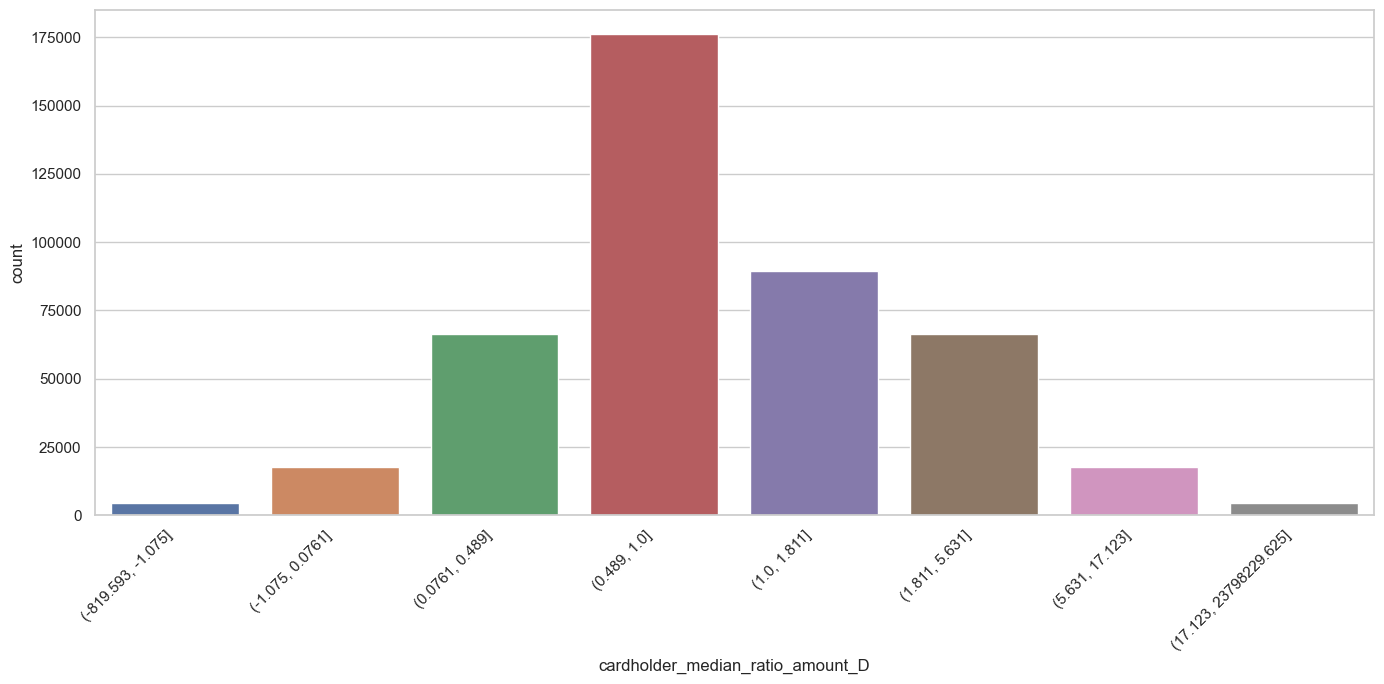

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="cardholder_median_ratio_amount_D", data=df8)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [70]:
df8[df8['cardholder_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,cardholder_median_ratio_amount,cardholder_median_ratio_amount_D
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,55.060,2.287686,"(1.811, 5.631]"
11,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McKee,P,GENERAL PURCHASE,127.80,DEARINGER PRINTING & TROP,2013-07-30,2013-07-31,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2013,7,31,Tuesday,28.425,4.496042,"(1.811, 5.631]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,130.000,3.423077,"(1.811, 5.631]"
26,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foye,S,GENERAL PURCHASE,178.00,"AFFYMETRIX, INC",2013-07-26,2013-07-29,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,74.000,2.405405,"(1.811, 5.631]"
31,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,145.00,OK MEDICAL BOARD,2013-07-27,2013-07-29,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,30,Saturday,55.000,2.636364,"(1.811, 5.631]"


The spending patterns of certain cardholders in relation to specific merchant categories are expected to be similar. We compute the median transaction amount to further evaluate the central tendency of the data. Comparing the median with the average helps us identify any potential anomalies that may deviate from the typical spending patterns of cardholders in a particular merchant category. Using the median helps to identify anomalies that stand out from the typical spending behavior of a cardholder within a specific merchant category, even if there are outliers present in the data.

### Feature 9: The ratio to average amount by description and merchant category

In [71]:
stat_by_description = df.groupby(['Description','Merchant_Category'])['Amount'].mean()
stat_by_description = pd.DataFrame(stat_by_description)
stat_by_description.columns = ['AVG_amount']
stat_by_description

AVG_amount
Description                   Merchant_Category                                              
                              AMUSEMENT PRKS,CIRCUSES,CARNIVLS,AND FORTUNE TE...  1500.000000
                              BOOK STORES                                          140.500000
                              BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED           181.600000
                              CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS          202.500000
                              CLEANING AND MAINTENANCE,JANITORIAL SERVICES         348.290000
...                                                                                       ...
vandal resistant camera EA    INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED         309.316667
vinyl roll                    STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITI...  1395.000000
white Trainers Tape Six R PCE BOOK STORES                                           19.290000
wire bar lid ea|cages ea      DURABLE GOODS, NOT ELSEWHERE CLASSIFIED              700.000000
{2-METHYL-4-{{4-METHYL-2- EA  DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE ...   184.700000

[90309 rows x 1 columns]

In [72]:
df9 = pd.merge(df, stat_by_description, how='left', on=['Description','Merchant_Category'])
df9['description_avg_ratio_amount'] = np.where(df9['AVG_amount']==0,0, df9['Amount'] / df9['AVG_amount'])
df9['description_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.988790e-01
std      1.830668e+14
min     -6.275203e+16
25%      2.304435e-01
50%      7.350532e-01
75%      1.000000e+00
max      6.275203e+16
Name: description_avg_ratio_amount, dtype: float64

In [73]:
df9[df9['description_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,description_avg_ratio_amount
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,184.893536,13.115656
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,184.893536,13.115656
29,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gann,D,CYLCARBONDIOXIDEIND200CGA3 MO|CYLCARBONDIOXIDE...,112.80,AIRGAS CENTRAL,2013-07-26,2013-07-29,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Friday,19.519302,5.778895
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,527.577185,6.789528
35,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,GODSEY,R,GENERAL PURCHASE,407.85,OPTIMUM ENERGY PROD,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,184.893536,2.205864


The transaction description provides specific details about each transaction, while the merchant category offers a general categorization. By considering both features together, we can gain a more complete understanding of each transaction, allowing us to identify any unusual patterns or inconsistencies. For example, transactions with unclear or misleading descriptions within a specific merchant category may raise suspicions and require further investigation.

### Feature 10: The ratio to median amount by description and merchant category

In [74]:
stat_by_description = df.groupby(['Description','Merchant_Category'])['Amount'].median()
stat_by_description = pd.DataFrame(stat_by_description)
stat_by_description.columns = ['Median_amount']
stat_by_description

Median_amount
Description                   Merchant_Category                                                
                              AMUSEMENT PRKS,CIRCUSES,CARNIVLS,AND FORTUNE TE...        1500.00
                              BOOK STORES                                                140.50
                              BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED                  35.90
                              CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS                 20.00
                              CLEANING AND MAINTENANCE,JANITORIAL SERVICES               434.50
...                                                                                         ...
vandal resistant camera EA    INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED               259.00
vinyl roll                    STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITI...        1395.00
white Trainers Tape Six R PCE BOOK STORES                                                 19.29
wire bar lid ea|cages ea      DURABLE GOODS, NOT ELSEWHERE CLASSIFIED                    700.00
{2-METHYL-4-{{4-METHYL-2- EA  DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE ...         184.70

[90309 rows x 1 columns]

In [75]:
# add the new feature average spending to the dataset 
df10 = pd.merge(df, stat_by_description, how='left', on=['Description','Merchant_Category'])
# Feature 10: ratio of amount spending and avergae spending by description
df10['description_median_ratio_amount'] = np.where(df10['Median_amount']==0,0, df10['Amount'] / df10['Median_amount'])
df10['description_median_ratio_amount'].describe()

count    442458.000000
mean          6.283462
std        1648.245175
min       -1038.555163
25%           0.623102
50%           1.000000
75%           1.593396
max      799940.491597
Name: description_median_ratio_amount, dtype: float64

In [76]:
# cut by percentile for plotting
var = 'description_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut( df10[var],percentile)
df10[['description_median_ratio_amount_D']]

,description_median_ratio_amount_D
0,"(2.015, 8.013]"
1,"(1.0, 2.015]"
2,"(0.477, 1.0]"
3,"(2.015, 8.013]"
4,"(1.0, 2.015]"
...,...
442453,"(2.015, 8.013]"
442454,"(8.013, 26.027]"
442455,"(1.0, 2.015]"
442456,"(26.027, 799940.492]"


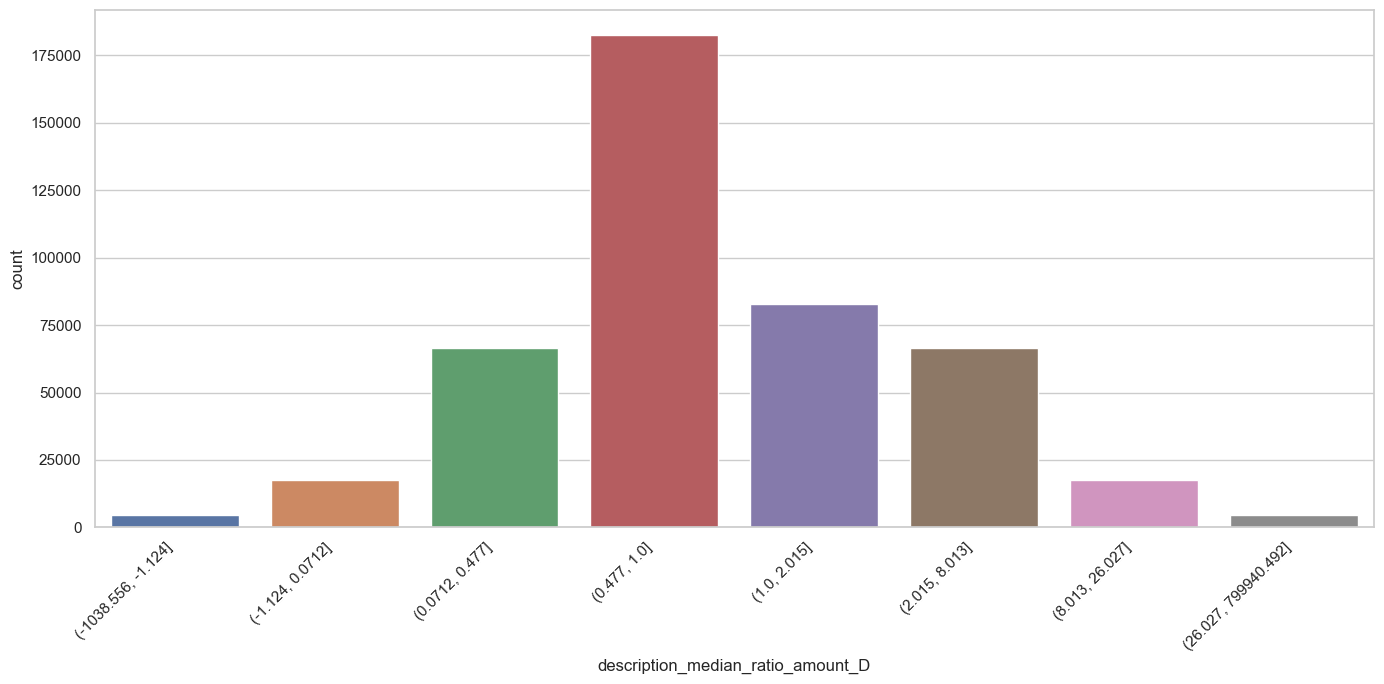

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="description_median_ratio_amount_D", data=df10)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [79]:
df10[df10['description_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,description_median_ratio_amount,description_median_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,250.00,3.560000,"(2.015, 8.013]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,36.37,2.650261,"(2.015, 8.013]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,99.58,3.959430,"(2.015, 8.013]"
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,31,Tuesday,207.73,2.754874,"(2.015, 8.013]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,77.63,5.732320,"(2.015, 8.013]"


By calculating this ratio, we can identify transactions that deviate significantly from the typical spending pattern within a specific description and merchant category. The choice to use the median in calculating the ratio to the median amount is based on its ability to provide a more reliable measure in the presence of outliers.

### Feature 11: The ratio to average amount by year_month and agency

In [80]:
stat_by_year_month = df.groupby(['Year_Month','Agency_Name'])['Amount'].mean()
stat_by_year_month = pd.DataFrame(stat_by_year_month)
stat_by_year_month.columns = ['AVG_amount']
stat_by_year_month

AVG_amount
Year_Month Agency_Name                                       
2013-07-01 ARDMORE HIGHER EDUCATION CENTER         -69.221250
           ATTORNEY GENERAL                        676.811594
           BD. OF CHEM. TEST ALCOHOL/DRUG          664.183333
           BD. OF EXAM. FOR LT CARE ADMIN          126.920000
           BD. OF MED. LICENSURE & SUPV.            50.386892
...                                                       ...
2014-06-01 UNIV.OF SCIENCE & ARTS OF OK            272.017959
           UNIVERSITY CENTER OF SOUTHERN OKLAHOMA  230.416667
           UNIVERSITY OF OKLAHOMA                  365.249781
           WATER RESOURCES BOARD                   185.602901
           WILL ROGERS MEMORIAL COMMISSION         233.666667

[1287 rows x 1 columns]

In [81]:
# add the new feature average spending to the dataset 
df11 = pd.merge(df, stat_by_year_month, how='left', on=['Year_Month','Agency_Name'])
# Feature 11: ratio of amount spending and avergae spending by year_month
df11['year_month_avg_ratio_amount'] = np.where(df11['AVG_amount']==0,0, df11['Amount'] / df11['AVG_amount'])
df11['year_month_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999995
std           6.297853
min        -123.573370
25%           0.088082
50%           0.296438
75%           0.951350
max        2600.505409
Name: year_month_avg_ratio_amount, dtype: float64

In [82]:
# cut by percentile for plotting
var = 'year_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df11[binned_var] = pd.qcut( df11[var],percentile)
df11[['year_month_avg_ratio_amount_D']]

,year_month_avg_ratio_amount_D
0,"(1.233, 3.919]"
1,"(1.233, 3.919]"
2,"(0.296, 1.233]"
3,"(0.296, 1.233]"
4,"(0.296, 1.233]"
...,...
442453,"(0.296, 1.233]"
442454,"(1.233, 3.919]"
442455,"(0.0664, 0.296]"
442456,"(10.698, 2600.505]"


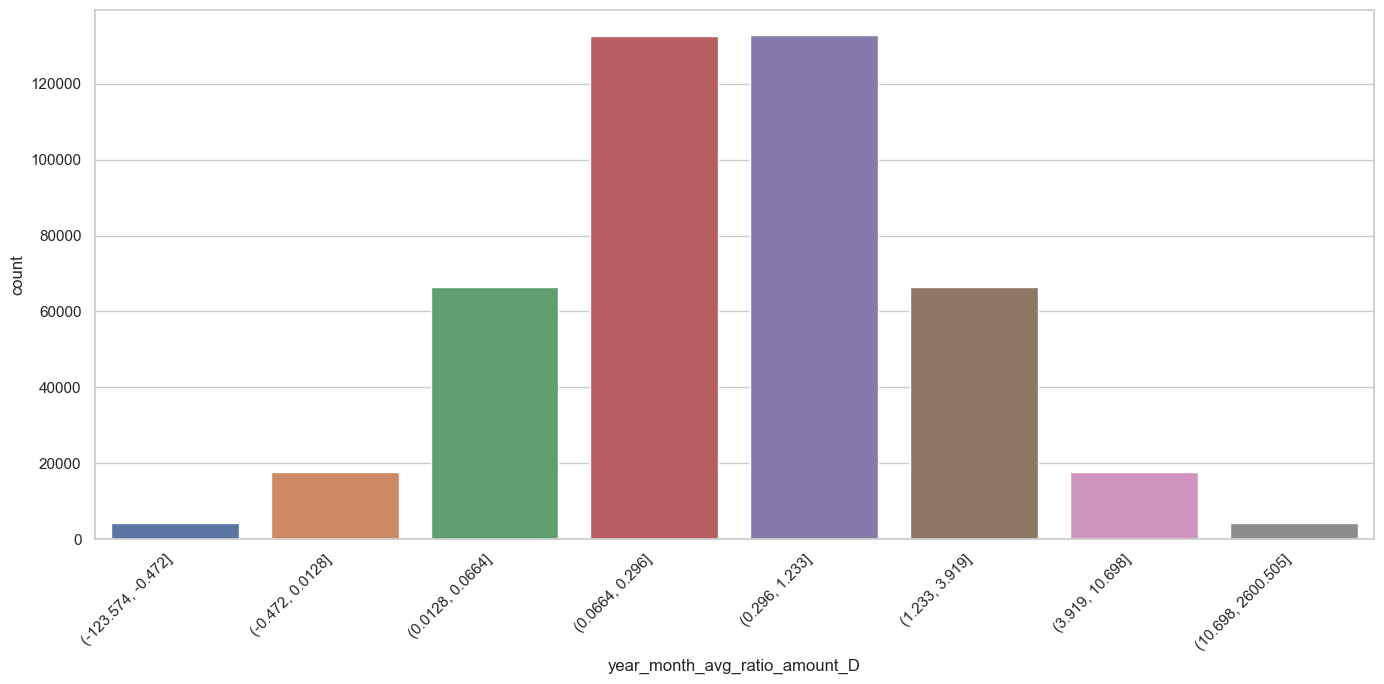

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="year_month_avg_ratio_amount_D", data=df11)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [84]:
df11[df11['year_month_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,year_month_avg_ratio_amount,year_month_avg_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,295.959575,3.007167,"(1.233, 3.919]"
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,295.959575,8.193687,"(3.919, 10.698]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,295.959575,8.193687,"(3.919, 10.698]"
20,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Morales,D,ROOM CHARGES,729.8,WESTIN DENVER DOWNTOWN,2013-07-29,2013-07-31,WESTIN HOTELS,2013,7,31,Monday,295.959575,2.465877,"(1.233, 3.919]"
21,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Morales,D,ROOM CHARGES,729.8,WESTIN DENVER DOWNTOWN,2013-07-29,2013-07-31,WESTIN HOTELS,2013,7,31,Monday,295.959575,2.465877,"(1.233, 3.919]"


Analyzing transaction trends and fluctuations over time by considering year_month enables us to understand the impact of seasonality on transaction amounts. Additionally, incorporating agency allows us to account for the unique characteristics and guidelines of different agencies that can influence transaction amounts. This approach enables us to identify anomalous transaction patterns that may be specific to certain agencies or time periods, providing valuable insights into potential irregularities.

### Feature 12: The ratio to median amount by year_month and agency

In [85]:
stat_by_year_month = df.groupby(['Year_Month','Agency_Name'])['Amount'].median()
stat_by_year_month = pd.DataFrame(stat_by_year_month)
stat_by_year_month.columns = ['Median_amount']
stat_by_year_month

Median_amount
Year_Month Agency_Name                                          
2013-07-01 ARDMORE HIGHER EDUCATION CENTER                88.985
           ATTORNEY GENERAL                              106.400
           BD. OF CHEM. TEST ALCOHOL/DRUG                272.550
           BD. OF EXAM. FOR LT CARE ADMIN                126.920
           BD. OF MED. LICENSURE & SUPV.                   4.750
...                                                          ...
2014-06-01 UNIV.OF SCIENCE & ARTS OF OK                   99.000
           UNIVERSITY CENTER OF SOUTHERN OKLAHOMA         71.765
           UNIVERSITY OF OKLAHOMA                         61.930
           WATER RESOURCES BOARD                          83.000
           WILL ROGERS MEMORIAL COMMISSION               109.000

[1287 rows x 1 columns]

In [86]:
# add the new feature average spending to the dataset 
df12 = pd.merge(df, stat_by_year_month, how='left', on=['Year_Month','Agency_Name'])
# Feature 12: ratio of amount spending and median spending by year_month
df12['year_month_median_ratio_amount'] = np.where(df12['Median_amount']==0,0, df12['Amount'] / df12['Median_amount'])
df12['year_month_median_ratio_amount'].describe()

count    442458.000000
mean          3.811705
std          42.388722
min        -515.945612
25%           0.321049
50%           1.000000
75%           3.158015
max       18945.749527
Name: year_month_median_ratio_amount, dtype: float64

In [87]:
# cut by percentile for plotting
var = 'year_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut( df12[var],percentile)
df12[['year_month_median_ratio_amount_D']]

,year_month_median_ratio_amount_D
0,"(4.118, 13.758]"
1,"(1.0, 4.118]"
2,"(1.0, 4.118]"
3,"(0.256, 1.0]"
4,"(1.0, 4.118]"
...,...
442453,"(1.0, 4.118]"
442454,"(4.118, 13.758]"
442455,"(0.256, 1.0]"
442456,"(39.814, 18945.75]"


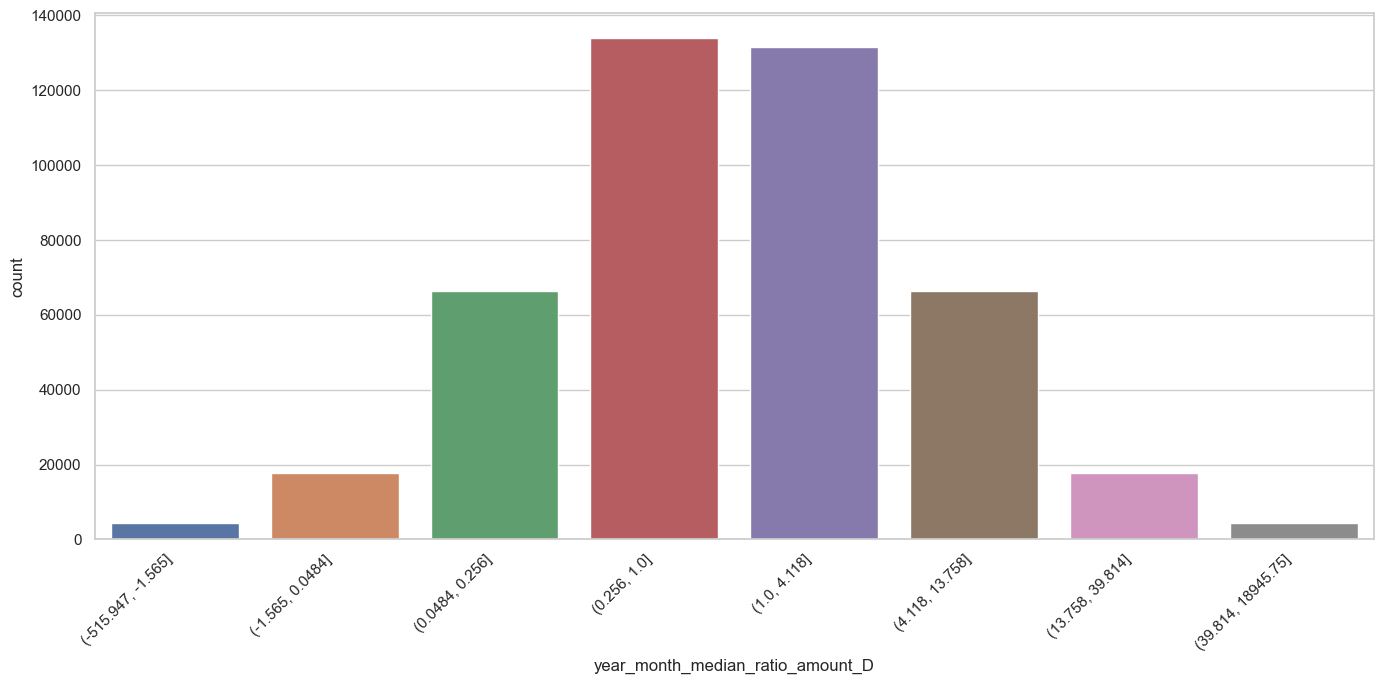

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="year_month_median_ratio_amount_D", data=df12)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [89]:
df12[df12['year_month_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,year_month_median_ratio_amount,year_month_median_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,102.915,8.647913,"(4.118, 13.758]"
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,102.915,3.585094,"(1.0, 4.118]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,102.915,3.831123,"(1.0, 4.118]"
10,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McGowin,R,GENERAL PURCHASE,278.23,RANDY'S FOODS,2013-07-29,2013-07-31,FREEZER AND LOCKER MEAT PROVISIONERS,2013,7,31,Monday,102.915,2.703493,"(1.0, 4.118]"
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,31,Tuesday,102.915,5.560608,"(4.118, 13.758]"


By using the median instead of the average, we can account for any extreme values or outliers that could skew the transaction amounts. When analyzing transaction data, it is important to consider the typical transaction amount for each combination of year_month and agency. By focusing on the median, we can better understand the overall distribution and identify any notable deviations or anomalies that may occur within specific time periods and agencies.

### Feature 13: The ratio to average amount by year_month and merchant category

In [90]:
stat_by_year_month = df.groupby(['Year_Month','Merchant_Category'])['Amount'].mean()
stat_by_year_month = pd.DataFrame(stat_by_year_month)
stat_by_year_month.columns = ['AVG_amount']
stat_by_year_month

AVG_amount
Year_Month Merchant_Category                                        
2013-07-01 ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES  2106.360000
           ADVERTISING SERVICES                           527.565528
           AGRICULTURAL COOPERATIVES                      374.533182
           AIR CANADA                                     299.550000
           AIR CHINA                                     1045.800000
...                                                              ...
2014-06-01 WHOLESALE CLUBS                               2664.800000
           WOMEN'S ACCESSORY AND SPECIALTY STORES         226.688000
           WOMEN'S READY-TO-WEAR STORES                   268.667143
           WRECKING AND SALVAGE YARDS                     300.000000
           WYNDHAM HOTELS                                 857.956000

[3672 rows x 1 columns]

In [91]:
# add the new feature average spending to the dataset 
df13 = pd.merge(df, stat_by_year_month, how='left', on=['Year_Month','Merchant_Category'])
# Feature 13: ratio of amount spending and avergae spending by year_month
df13['year_month_avg_ratio_amount'] = np.where(df13['AVG_amount']==0,0, df13['Amount'] / df13['AVG_amount'])
df13['year_month_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999959
std           3.767073
min        -808.666667
25%           0.138717
50%           0.421153
75%           0.978025
max         810.666667
Name: year_month_avg_ratio_amount, dtype: float64

In [92]:
# cut by percentile for plotting
var = 'year_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df13[binned_var] = pd.qcut( df13[var],percentile)
df13[['year_month_avg_ratio_amount_D']]

,year_month_avg_ratio_amount_D
0,"(1.183, 3.554]"
1,"(1.183, 3.554]"
2,"(0.103, 0.421]"
3,"(1.183, 3.554]"
4,"(0.421, 1.183]"
...,...
442453,"(0.421, 1.183]"
442454,"(3.554, 9.779]"
442455,"(0.103, 0.421]"
442456,"(9.779, 810.667]"


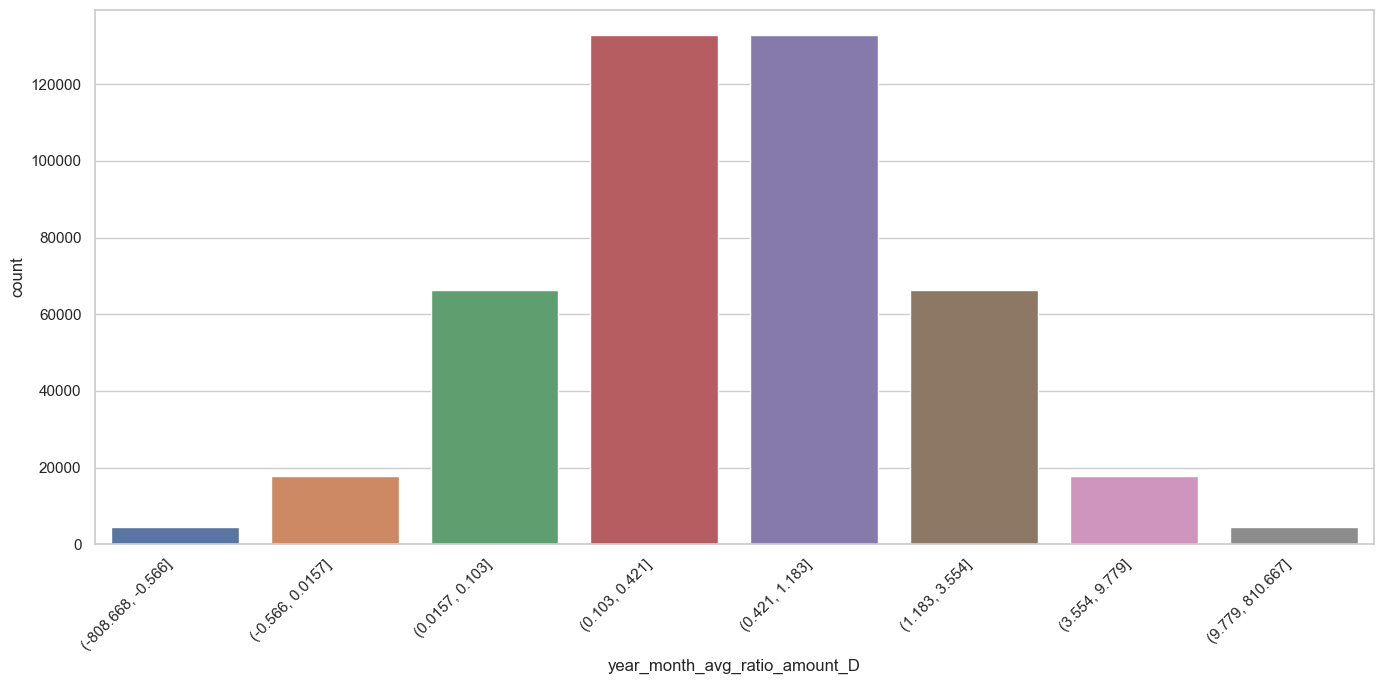

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="year_month_avg_ratio_amount_D", data=df13)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [94]:
df13[df13['year_month_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,year_month_avg_ratio_amount,year_month_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,194.146586,12.490562,"(9.779, 810.667]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,194.146586,12.490562,"(9.779, 810.667]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,622.908482,5.750443,"(3.554, 9.779]"
35,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,GODSEY,R,GENERAL PURCHASE,407.85,OPTIMUM ENERGY PROD,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,194.146586,2.100732,"(1.183, 3.554]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,622.908482,2.106569,"(1.183, 3.554]"


The inclusion of year_month and merchant category in the analysis allows us to gain a deeper understanding of transaction patterns. Year_month helps us identify trends and seasonality in transaction amounts over different time periods. On the other hand, merchant category provides insights into the specific types of products or services involved in the transactions. By considering both factors, we can pinpoint any anomalies or interesting patterns that may be unique to certain time periods or merchant categories.

### Feature 14: The ratio to median amount by year_month and merchant category

In [95]:
stat_by_year_month = df.groupby(['Year_Month','Merchant_Category'])['Amount'].median()
stat_by_year_month = pd.DataFrame(stat_by_year_month)
stat_by_year_month.columns = ['Median_amount']
stat_by_year_month

Median_amount
Year_Month Merchant_Category                                          
2013-07-01 ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES         483.30
           ADVERTISING SERVICES                                 284.05
           AGRICULTURAL COOPERATIVES                            193.75
           AIR CANADA                                           299.55
           AIR CHINA                                           1045.80
...                                                                ...
2014-06-01 WHOLESALE CLUBS                                     2664.80
           WOMEN'S ACCESSORY AND SPECIALTY STORES               165.55
           WOMEN'S READY-TO-WEAR STORES                         189.00
           WRECKING AND SALVAGE YARDS                           300.00
           WYNDHAM HOTELS                                       515.20

[3672 rows x 1 columns]

In [96]:
df14 = pd.merge(df, stat_by_year_month, how='left', on=['Year_Month','Merchant_Category'])
df14['year_month_median_ratio_amount'] = np.where(df14['Median_amount']==0,0, df14['Amount'] / df12['Median_amount'])
df14['year_month_median_ratio_amount'].describe()

count    4.424580e+05
mean              NaN
std               NaN
min              -inf
25%      3.210365e-01
50%      1.000000e+00
75%      3.158083e+00
max               inf
Name: year_month_median_ratio_amount, dtype: float64

In [97]:
df14[df14['year_month_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,year_month_median_ratio_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,241.620,8.647913
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,235.405,3.585094
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,95.750,3.831123
10,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McGowin,R,GENERAL PURCHASE,278.23,RANDY'S FOODS,2013-07-29,2013-07-31,FREEZER AND LOCKER MEAT PROVISIONERS,2013,7,31,Monday,370.230,2.703493
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,31,Tuesday,223.080,5.560608


By using the median, we focus on the middle value, which represents the typical transaction amount in a given year_month and merchant category combination. This approach helps to isolate the impact of outliers and provides a more representative measure of central tendency for our analysis.

### Feature 15: The ratio to average amount by agency and merchant category, week 1

In [98]:
week1_data = df[df['Week_Number'] == 1]
stat_by_agency_week1 = week1_data.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency_week1 = pd.DataFrame(stat_by_agency_week1)
stat_by_agency_week1.columns = ['AVG_amount']
stat_by_agency_week1

AVG_amount
Agency_Name                    Merchant_Category                                             
ATTORNEY GENERAL               MISCELLANEOUS AND SPECIALTY RETAIL STORES               302.55
                               TELECOMMUNICATION SERVICES                              162.18
                               TOLLS AND BRIDGE FEES                                   145.45
BD. OF CHEM. TEST ALCOHOL/DRUG CIVIC,SOCIAL AND FRATERNAL ASSOCIATIONS                 350.00
BD. OF MED. LICENSURE & SUPV.  BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED               38.64
...                                                                                       ...
`DEPARTMENT OF EDUCATION       DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE ...      405.86
                               INFORMATION RETRIEVAL SERVICES                           45.00
                               MISCELLANEOUS PUBLISHING AND PRINTING SERVICES         1362.53
                               SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ...      325.00
                               WYNDHAM HOTELS                                            0.00

[1036 rows x 1 columns]

In [99]:
df15 = pd.merge(week1_data, stat_by_agency_week1, how='left', on=['Agency_Name', 'Merchant_Category'])
df15['agency_merchant_avg_ratio_amount_week1'] = np.where(df15['AVG_amount']==0,0, df15['Amount'] / df15['AVG_amount'])
df15['agency_merchant_avg_ratio_amount_week1'].describe()

count    3937.000000
mean        0.998476
std         8.770862
min      -388.374384
25%         0.293399
50%         0.844765
75%         1.156618
max       354.679803
Name: agency_merchant_avg_ratio_amount_week1, dtype: float64

In [100]:
var = 'agency_merchant_avg_ratio_amount_week1'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df15[binned_var] = pd.qcut(df15[var],percentile)
df15[['agency_merchant_avg_ratio_amount_week1_D']]

,agency_merchant_avg_ratio_amount_week1_D
0,"(0.217, 0.845]"
1,"(0.217, 0.845]"
2,"(0.217, 0.845]"
3,"(0.217, 0.845]"
4,"(1.373, 3.118]"
...,...
3932,"(0.845, 1.373]"
3933,"(0.217, 0.845]"
3934,"(0.217, 0.845]"
3935,"(1.373, 3.118]"


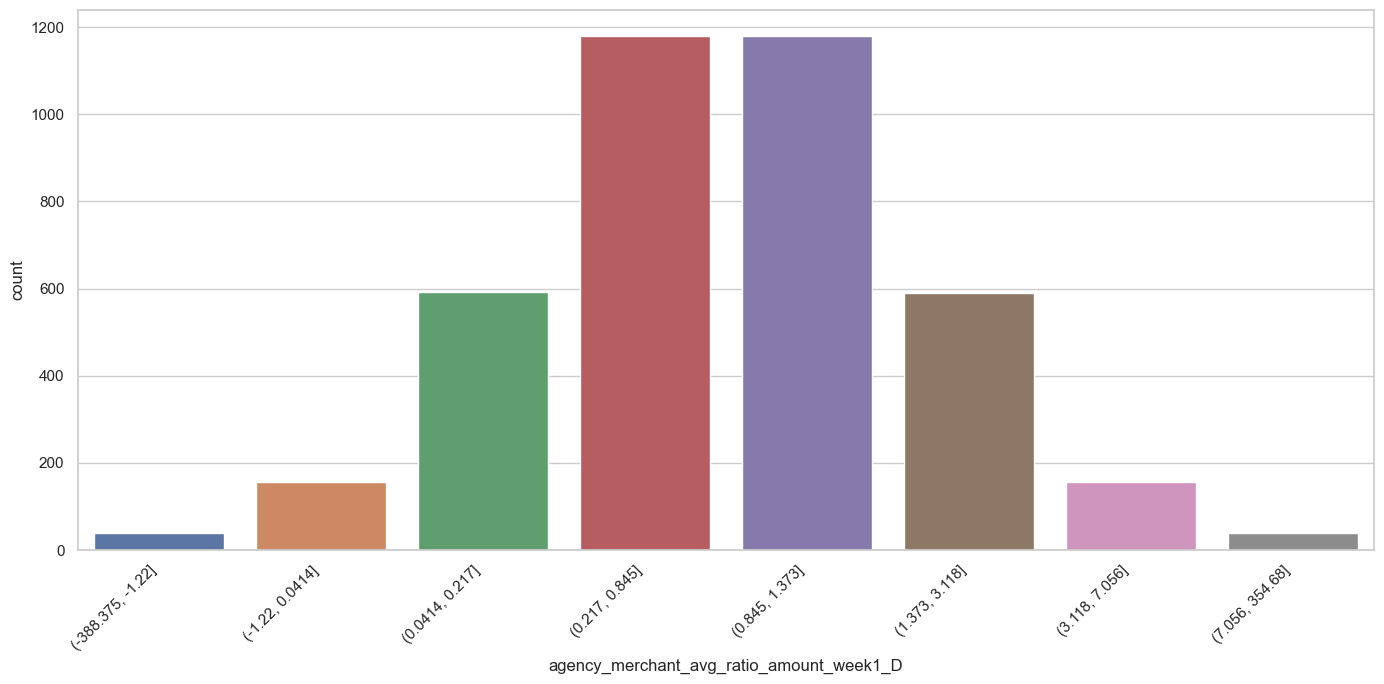

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="agency_merchant_avg_ratio_amount_week1_D", data=df15)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [102]:
df15[df15['agency_merchant_avg_ratio_amount_week1']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount_week1,agency_merchant_avg_ratio_amount_week1_D
4,2013-12-01,1000,OKLAHOMA STATE UNIVERSITY,Benn,A,GENERAL PURCHASE,349.84,BEST WELDERS SUPPLY INC,2013-12-30,2013-12-31,HARDWARE EQUIPMENT AND SUPPLIES,2013,12,1,Monday,151.598571,2.307673,"(1.373, 3.118]"
5,2013-12-01,1000,OKLAHOMA STATE UNIVERSITY,Benn,A,GENERAL PURCHASE,510.67,BEST WELDERS SUPPLY INC,2013-12-30,2013-12-31,HARDWARE EQUIPMENT AND SUPPLIES,2013,12,1,Monday,151.598571,3.368567,"(3.118, 7.056]"
8,2013-12-01,1000,OKLAHOMA STATE UNIVERSITY,Bolek,M,GENERAL PURCHASE,1024.76,ACCUTEK LABORATORIES,2013-12-30,2013-12-31,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,12,1,Monday,441.303333,2.322122,"(1.373, 3.118]"
36,2013-12-01,1000,OKLAHOMA STATE UNIVERSITY,Roybal,T,Handbook of Psychology In PCE,914.27,Amazon.com,2013-12-30,2013-12-31,BOOK STORES,2013,12,1,Monday,137.660851,6.641467,"(3.118, 7.056]"
37,2013-12-01,1000,OKLAHOMA STATE UNIVERSITY,Santelli,D,GENERAL PURCHASE,2296.54,BUEHLER LTD,2013-12-30,2013-12-31,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,12,1,Monday,265.715789,8.642844,"(7.056, 354.68]"


Analyzing the ratio to average amount by agency and merchant category during week 1 allows us to identify unique trends, changes, and anomalies that may arise within that particular timeframe. This analysis provides insights into the spending patterns of different agencies and merchant categories specifically during week 1.



### Feature 16: The ratio to average amount by agency and merchant category, week 2

In [103]:
week2_data = df[df['Week_Number'] == 2]
stat_by_agency_week2 = week2_data.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency_week2 = pd.DataFrame(stat_by_agency_week2)
stat_by_agency_week2.columns = ['AVG_amount']
stat_by_agency_week2

AVG_amount
Agency_Name                     Merchant_Category                                             
ARDMORE HIGHER EDUCATION CENTER GROCERY STORES,AND SUPERMARKETS                     132.620000
ATTORNEY GENERAL                AMERICAN AIRLINES                                   447.333333
                                BOOK STORES                                          24.990000
                                CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS          15.000000
                                DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE ...  356.000000
...                                                                                        ...
`DEPARTMENT OF EDUCATION        COMFORT HOTEL INTERNATIONAL                         187.580000
                                COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE  903.055000
                                FAST FOOD RESTAURANTS                                57.460000
                                MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSIFIED  600.000000
                                SHERATON                                            658.600000

[1659 rows x 1 columns]

In [104]:
df16 = pd.merge(week2_data, stat_by_agency_week2, how='left', on=['Agency_Name', 'Merchant_Category'])
df16['agency_merchant_avg_ratio_amount_week2'] = np.where(df16['AVG_amount']==0,0, df16['Amount'] / df16['AVG_amount'])
df16['agency_merchant_avg_ratio_amount_week2'].describe()

count    9857.000000
mean        0.998884
std         3.315506
min       -98.905983
25%         0.261002
50%         0.706493
75%         1.104224
max       123.418803
Name: agency_merchant_avg_ratio_amount_week2, dtype: float64

In [105]:
var = 'agency_merchant_avg_ratio_amount_week2'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df16[binned_var] = pd.qcut(df16[var],percentile)
df16[['agency_merchant_avg_ratio_amount_week2_D']]

,agency_merchant_avg_ratio_amount_week2_D
0,"(3.251, 7.446]"
1,"(-0.538, 0.0374]"
2,"(1.317, 3.251]"
3,"(0.198, 0.706]"
4,"(0.198, 0.706]"
...,...
9852,"(1.317, 3.251]"
9853,"(0.706, 1.317]"
9854,"(7.446, 123.419]"
9855,"(-98.90700000000001, -0.538]"


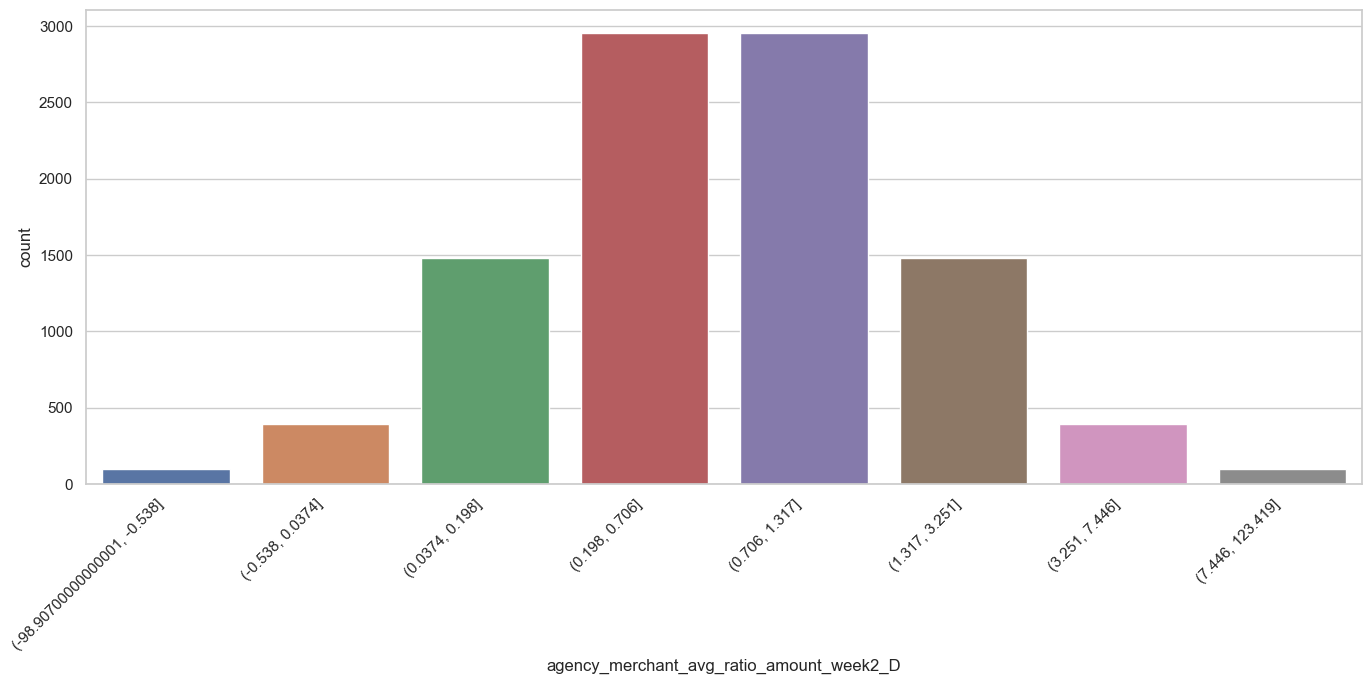

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="agency_merchant_avg_ratio_amount_week2_D", data=df16)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [107]:
df16[df16['agency_merchant_avg_ratio_amount_week2']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount_week2,agency_merchant_avg_ratio_amount_week2_D
0,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Arena,A,GENERAL PURCHASE,891.00,WWW.ESPRITMODEL.COM,2014-01-08,2014-01-09,"HOBBY,TOY,AND GAME STORES",2014,1,2,Wednesday,180.587619,4.933893,"(3.251, 7.446]"
2,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,M,GENERAL PURCHASE,175.06,FRED-MEYER #0653,2014-01-06,2014-01-07,"GROCERY STORES,AND SUPERMARKETS",2014,1,2,Monday,59.063851,2.963911,"(1.317, 3.251]"
21,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Arthur,H,Consulting Services EA,798.00,"CSP BUSINESS MEDIA, LLC",2014-01-08,2014-01-09,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2014,1,2,Wednesday,333.013431,2.396300,"(1.317, 3.251]"
23,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Bailey,J,GENERAL PURCHASE,2945.00,TRAINING CAMP,2014-01-07,2014-01-09,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,2014,1,2,Tuesday,670.439600,4.392640,"(3.251, 7.446]"
25,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Barnett,K,5802553674315 ITM,281.82,ATT BUS PHONE PMT,2014-01-09,2014-01-09,TELECOMMUNICATION SERVICES,2014,1,2,Thursday,59.741200,4.717347,"(3.251, 7.446]"


Analyzing the ratio to average amount by agency and merchant category during week 2 allows us to identify unique trends, changes, and anomalies that may arise within that particular timeframe. This analysis provides insights into the spending patterns of different agencies and merchant categories specifically during week 2.

### Feature 17: The ratio to average amount by agency and merchant category, week 3

In [108]:
week3_data = df[df['Week_Number'] == 3]
stat_by_agency_week3 = week3_data.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency_week3 = pd.DataFrame(stat_by_agency_week3)
stat_by_agency_week3.columns = ['AVG_amount']
stat_by_agency_week3

AVG_amount
Agency_Name                     Merchant_Category                                              
ARDMORE HIGHER EDUCATION CENTER HOME SUPPLY WAREHOUSE STORES                           7.980000
ATTORNEY GENERAL                AMERICAN AIRLINES                                    591.333333
                                BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED          1081.666667
                                COAST HOTELS                                         164.266667
                                COMMERCIAL FURNITURE                                 105.420000
...                                                                                         ...
`DEPARTMENT OF EDUCATION        HOLIDAY INNS                                          83.000000
                                MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSIFIED   600.000000
                                MISCELLANEOUS PUBLISHING AND PRINTING SERVICES       429.000000
                                SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ...  2500.000000
                                STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITI...   314.435000

[1712 rows x 1 columns]

In [109]:
df17 = pd.merge(week3_data, stat_by_agency_week3, how='left', on=['Agency_Name', 'Merchant_Category'])
df17['agency_merchant_avg_ratio_amount_week3'] = np.where(df17['AVG_amount']==0,0, df17['Amount'] / df17['AVG_amount'])
df17['agency_merchant_avg_ratio_amount_week3'].describe()

count    9.889000e+03
mean     9.989723e-01
std      4.240818e+14
min     -2.462132e+16
25%      2.456800e-01
50%      7.422690e-01
75%      1.089164e+00
max      3.315529e+16
Name: agency_merchant_avg_ratio_amount_week3, dtype: float64

In [110]:
var = 'agency_merchant_avg_ratio_amount_week3'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df17[binned_var] = pd.qcut(df17[var],percentile)
df17[['agency_merchant_avg_ratio_amount_week3_D']]

,agency_merchant_avg_ratio_amount_week3_D
0,"(7.308, 3.315528935046906e+16]"
1,"(1.3, 3.094]"
2,"(1.3, 3.094]"
3,"(0.184, 0.742]"
4,"(0.184, 0.742]"
...,...
9884,"(-0.634, 0.034]"
9885,"(-0.634, 0.034]"
9886,"(-0.634, 0.034]"
9887,"(-0.634, 0.034]"


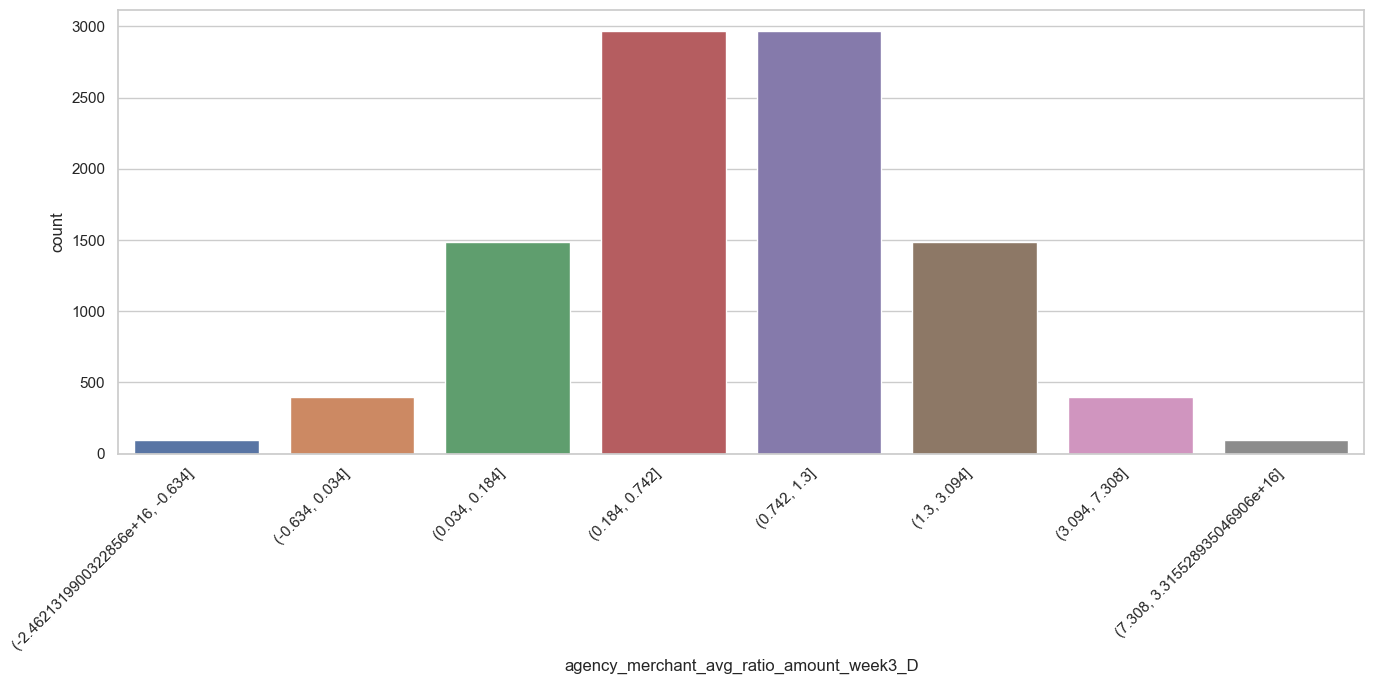

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# df1 = pd.DataFrame({
#     'agency_merchant_avg_ratio_amount_D': [...],
#     ...
# })

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,7))

sns.countplot(x="agency_merchant_avg_ratio_amount_week3_D", data=df17)

# Rotate x-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Ensure the layout fits everything properly
plt.tight_layout()

plt.show()

In [112]:
df17[df17['agency_merchant_avg_ratio_amount_week3']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount_week3,agency_merchant_avg_ratio_amount_week3_D
0,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Hood,K,GENERAL PURCHASE,3350.31,A.M.M.R. SERVICES INC,2014-01-16,2014-01-27,HARDWARE STORES,2014,1,3,Thursday,168.899242,19.836146,"(7.308, 3.315528935046906e+16]"
1,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Tornakian,M,GENERAL PURCHASE,658.21,STILLWATER WINNELSON C,2014-01-15,2014-01-27,PLUMBING AND HEATING EQUIPMENT AND SUPPLIES,2014,1,3,Wednesday,235.886111,2.790372,"(1.3, 3.094]"
2,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Burns,R,GENERAL PURCHASE,787.49,PAYPAL IFI,2014-01-14,2014-01-15,"CIVIC,SOCIAL AND FRATERNAL ASSOCIATIONS",2014,1,3,Tuesday,378.832222,2.078730,"(1.3, 3.094]"
26,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Budd,C,JANITORIAL SUPPLIES NMB,599.00,"GRIMSLEY'S, INC.",2014-01-13,2014-01-15,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2014,1,3,Monday,294.588220,2.033347,"(1.3, 3.094]"
31,2014-01-01,1000,OKLAHOMA STATE UNIVERSITY,Challis,W,APC BE1500G BATTERY BACKUP EA,399.98,STAPLES 00105288,2014-01-13,2014-01-15,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2014,1,3,Monday,109.351733,3.657738,"(3.094, 7.308]"


Analyzing the ratio to average amount by agency and merchant category during week 3 allows us to identify unique trends, changes, and anomalies that may arise within that particular timeframe. This analysis provides insights into the spending patterns of different agencies and merchant categories specifically during week 3.